<a href="https://colab.research.google.com/github/levynlee/ESAA/blob/main/0930_%ED%95%84%EC%82%AC%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**6. 토픽 모델링(Topic Modeling) - 20 뉴스그룹**

**토픽 모델링**이란 문서 집합에 숨어 있는 주제를 찾아내는 것이다. 많은 양의 문서가 있을 때 사람이 이 문서를 다 읽고 핵심 주제를 찾는 것은 매우 많은 시간이 소모된다. 이 경우에 머신러닝 기반의 토픽 모델링을 적용해 숨어 있는 중요 주제를 효과적으로 찾아낼 수 있다. 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신 러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.  

머신러닝 기반의 토픽 모델링에 자주 사용되는 기법은 **LSA(Latent Semantic Analysis)와 LDA(Latent Dirichlet Allocation)**이다.  

토픽 모델링에 사용되는 LDA(Latent Dirichlet Allocation)와 앞서 차원 축소의 LDA(Linear Discriminant Analysis)는 약어만 같을 뿐 서로 다른 알고리즘이므로 유의해야 한다.  

앞의 텍스트 분류에서 소개한 20 뉴스그룹 데이터 세트를 이용해 토픽 모델링을 적용해보자. 20가지의 주제를 가진 뉴스그룹의 데이터 중 모터사이클, 야구, 그래픽스, 윈도우, 중동, 기독교, 전자공학, 의학의 8개 주제를 추출하고 이들 텍스트에 LDA 기반의 토픽 모델링을 적용해보자.  

사이킷런은 LDA 기반의 토픽 모델링을 LatentDirichletAllocation 클래스로 제공한다. 사이킷런 초기 버전에는 LDA 토픽 모델링을 제공하지 않았으나 gensim과 같은 토픽 모델링 패키지가 인기를 끌면서 사이킷런도 LDA를 제공하게 되었다.  

먼저 LDA 토픽 모델링을 위해 fetch_20newsgroups() API는 categories 파라미터를 통해 필요한 주제만 필터링해 추출하고 추출된 텍스트를 Count 기반으로 벡터화 변환한다. LDA는 Count 기반의 벡터화만 사용한다. max_features=1000으로 word 피처의 개수를 제한하고, ngram_range는 (1,2)로 설정하고 피처 벡터화 변환한다.  

In [50]:

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 8개 주제 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# cats 변수로 기재된 카테고리만 추출
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories=cats, random_state=0)

# LDA는 Count 기반 벡터화만 적용
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


CountVectorizer 객체 변수인 feat_vect 모두 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터이다. 이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행한다. 토픽의 개수는 위의 뉴스그룹에서 추출한 주제와 동일한 8개로 정한다. LatentDirichletAllocation 클래스의 n_components 파라미터를 이용해 토픽 개수를 조정한다. (random_state 값은 예제를 수행할 때마다 결과가 똑같게 하기 위해 입력한다.)

In [51]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

LatentDirichletAllocation.fit(데이터세트)를 수행하면 LatentDirichletAllocation 객체는 compoenents_ 속성값을 가지게 된다. components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 가지고 있다. 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 된다. components_ 의 형태와 속성값을 확인해보자.

In [52]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

components_는 array[8,1000]으로 구성되어 있다. 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 가지고 있다. lda_model.components_ 값만으로는 각 토픽별 word 연관도를 보기 어렵다. 따라서 display_topics() 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 word를 나열해본다.

In [53]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_ array를 값이 큰 순으로 정렬하고 인덱스 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word 명칭을 get_feature_names_out()을 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별 가장 연관도가 높은 word 15개 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


Topic #0의 경우 일부 불분명한 주제어들이 있지만 주로 의학에 관련된 주제어가 추출되었다. Topic #1의 경우 명확하지 않고 일반적인 단어가 주를 이루고 있다. Topic #2는 컴퓨터 그래픽스 영역의 주제어가 다수 포함되어 있다. Topic #3은 일반적인 단어로 주제어가 추출되었다. Topic #4는 명확하게 중동 영역의 주제어가 추출되었다. Topic #5는 일부 컴퓨터 그래픽스 영역의 주제어를 포함하고 있지만 전반적인 컴퓨터 관련 용어들을 가지고 있어서 8개 토픽 중 하나로 매핑하기는 어렵다. Topic #6은 명확하게 기독교 관련 주제어가 추출되었다. Topic #7은 윈도우 운영체제와 관련된 주제어가 추출되었다.

##**8. 문서 유사도**

###**8.1 문서 유사도 측정 방법 - 코사인 유사도**

문서와 문서 간의 유사도 비교는 일반적으로 **코사인 유사도 (Cosine Similarity)**를 사용한다. 코사인 유사도는 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 **벡터의 상호 방향성이 얼마나 유사한지**에 기반한다. 즉, 코사인 유사도는 **두 벡터 사이의 사잇각**을 구해서 얼마나 유사한지 수치로 적용한 것이다.

###**8.2 두 벡터 사잇각**

두 벡터의 사잇각에 따라서 상호 관계는  
1. 유사하거나
2. 관련이 없거나
3. 반대 관계

가 될 수 있다.  

코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유가 있다. 먼저 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉽다. 이러한 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표(e.g. 유클리드 거리 기반 지표)는 정확도가 떨어지기 쉽다. 또한 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 빈도수에만 기반해서는 공정한 비교를 할 수 없다. 예를 들어 A 문서에서 '머신러닝'이라는 단어가 5번 언급되고 B 문서에서는 3번 언급됐을 때 A 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 쉽게 판단해서는 안 된다. A 문서가 B 문서보다 10배 이상 크다면 오히려 B 문서가 '머신러닝'과 더 밀접하게 관련된 문서라고 판단할 수 있기 때문이다.  

간단한 문서에 대해서 서로 간의 문서 유사도를 코사인 유사도 기반으로 구해보자. 먼저 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 cos_similarity() 함수를 작성한다.

In [54]:
# 두 개의 넘파이 배열에 대한 코사인 유사도를 구하는 함수
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
  similarity = dot_product/l2_norm
  return similarity

doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환한다.

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hold goes']

tfid_vect_simple = TfidfVectorizer()
feature_vect_simple = tfid_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


반환된 행렬은 희소 행렬이므로 앞에서 작성한 cos_similarity() 함수의 인자인 array로 만들기 위해 밀집 행렬로 반환한 뒤 다시 각각을 배열로 변환한다. feature_vect_dense[0]은 doc_list 첫 번째 문서의 피처 벡터화이며, feature_vect_dense[1]은 doc_list 두 번째 문서의 피처 벡터화이다. 위에서 작성한 cos_similarity() 함수를 이용해 두 개 문서의 유사도를 측정해보자.

In [56]:
# TFidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 1, 2번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 두 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


다음으로 첫 번재 문장과 세 번째 문장, 그리고 두 번째 문장과 세 번째 문장의 유사도도 측정한다.

In [57]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 1, 문장 3 Cosine 유사도: 0.456


사이킷런은 코사인 유사도를 측정하기 위해 sklearn.metrics.pairwise.cosine_similarity API를 제공한다.   

cosine_similarity() 함수는 두 개의 입력 파라미터를 받는다. 첫 번째 파라미터는 비교 기준이 되는 문서의 피처 행렬, 두 번째 파라미터는 비교되는 문서의 피처 행렬이다.  

cosine_similarity()는 희소 행렬, 밀집 행렬 모두가 가능하며, 행렬 또는 배열 모두 가능하다. 따라서 앞에서 만든 cos_similarity() 함수와 같이 별도의 변환 작업이 필요없다.  

첫 번째 문서와 비교해 바로 자신 문서인 첫 번째 문서, 그리고 두 번째, 세 번째 문서의 유사도를 측정해보자.

In [58]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [59]:
# 첫 번째 유사도 값 1 (자기 자신에 대한 유사도) 제거
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


cosine_similarity()는 쌍으로 코사인 유사도 값을 제공할 수 있다. 모든 개별 문서에 쌍으로 코사인 유사도 값을 계산해보자. 즉, 1번째 문서와 2, 3번째 문서의 코사인 유사도, 2번째 문서와 1, 3번째 문서의 코사인 유사도, 3번째 문서와 1, 2번째 코사인 유사도를 ndarray 형태로 제공한다.

In [60]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


###**8.3 Opinion Review 데이터 세트를 이용한 문서 유사도 측정**

In [61]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord(): 아스키 코드 생성
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

In [64]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , \
                             ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


이전 절에서 해당 문서의 군집화는 전자제품, 호텔, 자동차를 주제로 되었다. 이 중 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도를 알아보자. 문서를 피처 벡터화해 변환하면 문서 내 단어에 출현 빈도와 같은 값을 부여해 각 문서가 단어 피처의 값으로 벡터화된다. 이렇게 각 문서가 피처 벡터화된 데이터를 cosine_simularity()를 이용해 상호 비교해 유사도를 확인하자.  

먼저 이를 위해 호텔을 주제로 군집화된 데이터를 먼저 추출하고 이 데이터에 해당하는 TfidfVectorizer의 데이터를 추출한다.

In [65]:
from sklearn.metrics.pairwise import cosine_similarity

#clusterjab인=2인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==2] .index
print('호텔로 클러스터링 된 문서들의 DataFrame Index： ', hotel_indexes)

#호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, ' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정'''

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)


호텔로 클러스터링 된 문서들의 DataFrame Index：  Index([ 1,  2,  4,  8, 10, 13, 15, 16, 19, 21, 22, 23, 24, 25, 26, 28, 30, 31,
       40, 43, 45, 48],
      dtype='int64')
##### 비교 기준 문서명 /content/topics/battery-life_netbook_1005ha  와 타 문서 유사도######
[[1.         0.04259058 0.0174721  0.87235155 0.02117479 0.02899307
  0.00819181 0.01468175 0.01720395 0.01973879 0.01197555 0.01382194
  0.04361664 0.01279173 0.01109643 0.16753386 0.01035881 0.0828197
  0.03440586 0.37537732 0.03321949 0.0079295 ]]


단순히 숫자로만 표시해서는 직관적으로 문서가 어느 정도 유사도를 가지는지 이해하기 어려울 수 있으므로 첫 번째 문서와 다른 문서 간에 유사도가 높은 순으로 이를 정렬하고 시각화해본다.  

cosine_similarity()는 쌍 형태의 ndarray를 반환하므로 이를 판다스 인덱스로 이용하기 위해 reshape(-1)로 차원을 변경한다.

가장 유사도가 큰 파일명 및 유사도:
 filename      /content/topics/battery-life_ipod_nano_8gb
similarity                                      0.872352
Name: 8, dtype: object


Text(0.5, 1.0, '/content/topics/battery-life_netbook_1005ha')

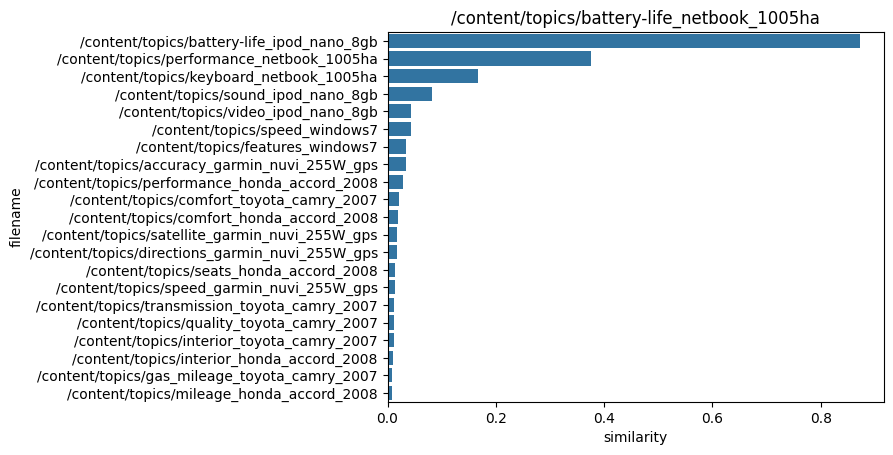

In [66]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0,:])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

##**9. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

###**9.1 한글 NLP 처리의 어려움**

한글은 띄어쓰기와 다양한 조사 때문에 영어 등의 라틴어보다 처리가 어렵다. 띄어쓰기를 잘못 할 경우 영어처럼 아예 없는 단어로 인식되는 게 아니라 다른 의미로 인식되는 경우가 많다. 또한 조사의 종류가 매우 많고 조사의 띄어쓰기가 잘못된 경우 그것이 조사인지 또 다른 단어인지 인식하기가 매우 어렵다.

###**9.2 KoNLPy 소개**

KoNLPy는 파이썬의 대표적인 한글 형태소 패키지이다. 형태소는 '단어로서 의미를 가지는 최소 단위'이다.  형태소 분석(Morphological analysis)이란 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업을 일반적으로 지칭한다.  



In [67]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 21.9 MB/s eta 0:00:00


###**9.3 데이터 로딩**

In [68]:
import pandas as pd
train_df = pd.read_csv('/content/ratings_train.txt', sep='\t', encoding='utf-8') #코드 오류 수정
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [69]:
# 학습 데이터 세트의 0과 1의 Label 값 비율 확인
# 1이 긍정 0이 부정 감성
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


0과 1의 비율이 어느 한쪽으로 치우치지 않고 균등한 분포를 가진다. train_df의 경우 리뷰 텍스트를 가지는 'document' 칼럼에 Null이 일부 존재하므로 이 값은 공백으로 변환한다. 문자가 아닌 숫자의 경우 단어적인 의미로 부족하므로 파이썬의 정규 표현식 모듈인 re를 이용해 이 역시 공백으로 변환한다. 테스트 데이터 세트의 경우도 파일을 로딩하고 동일한 데이터 가공을 수행한다.

In [71]:
import re

train_df = train_df.fillna(' ')
#정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x) )

#테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/ratings_test.txt', sep='\t', encoding='utf-8')
test_df['document'] = test_df['document'].astype(str).apply(lambda x: re.sub(r"\d+", " ", x))

#id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

이제 TF-IDF 방식으로 단어를 벡터화한다. 먼저 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화한다. 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스를 이용한다. Twitter 객체의 morphs() 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환한다.

In [72]:
from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


TfidfVectorizer를 이용해 TF-IDF 피처 모델을 생성한다. tokenizer는 위에서 만든 tw_tokenizer() 함수를 이용한다. ngram은 (1,2), min_df=3, max_df는 상위 90%로 제한한다.

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#Twitter 객체의 morphs( ) 객체를 이용한 tokenizer를 사용. ngram_range는 (1, 2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1, 2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


로지스틱 회귀를 이용해 분류 기반의 감성 분석을 수행한다. 로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV를 이용한다.

In [76]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0, solver='liblinear')

# 파라미터 C 최적화를 위해 GridSearchCV 이용
params = {'C': [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


C가 3.5일 때 최고 0.8593의 정확도를 보였다.  

이제 테스트 세트를 이용해 최종 감성 분석 예측을 수행한다. 테스트 세트를 이용해 예측할 때는 학습할 때 적용한 TfidfVectorizer를 그대로 사용해야 한다. 그래야만 학습 시 설정된 TfidfVectorizer로 변환할 피처 개수가 같아진다. 학습 데이터에 사용된 TfidfVectorizer 객체 변수인 tfidf_vect를 이용해 transform()을 테스트 데이터의 document 칼럼에 수행한다.

In [77]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifeir는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도:', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도: 0.86172
